<a href="https://colab.research.google.com/github/FaldoFajri/aplikasi-web-deteksi-covid19/blob/main/Final_Code_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/FaldoFajri/tubes-mesinbelajar.git

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [ ]:
test_dir = "/content/tubes-mesinbelajar/dataset/test"
train_dir = "/content/tubes-mesinbelajar/dataset/train"
val_dir = "/content/tubes-mesinbelajar/dataset/val"

In [ ]:
image_shape = (100,100,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 32)      

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose = 1)

best_model_path = 'ModelCNN_terbaru.h5'
checkpoint_callback = ModelCheckpoint(best_model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
batch_size = 64

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 1511 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 215 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 432 images belonging to 2 classes.


In [ ]:
print(train_image_gen.class_indices)
print(val_image_gen.class_indices)

{'covid': 0, 'normal': 1}
{'covid': 0, 'normal': 1}


In [ ]:
results = model.fit(train_image_gen,epochs=100,
                              validation_data=val_image_gen,
                             callbacks=[checkpoint_callback])

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.7340
Epoch 1: val_accuracy improved from -inf to 0.73488, saving model to ModelCNN_terbaru.h5
24/24 [==============================] - 54s 2s/step - loss: 0.5896 - accuracy: 0.7340 - val_loss: 0.5134 - val_accuracy: 0.7349
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.3656 - accuracy: 0.8259
Epoch 2: val_accuracy improved from 0.73488 to 0.93023, saving model to ModelCNN_terbaru.h5
24/24 [==============================] - 37s 2s/step - loss: 0.3656 - accuracy: 0.8259 - val_loss: 0.2082 - val_accuracy: 0.9302
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.2905 - accuracy: 0.8981
Epoch 3: val_accuracy did not improve from 0.93023
24/24 [==============================] - 36s 2s/step - loss: 0.2905 - accuracy: 0.8981 - val_loss: 0.1767 - val_accuracy: 0.9256
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9345
E

Epoch 30/100
24/24 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9815
Epoch 30: val_accuracy did not improve from 0.98605
24/24 [==============================] - 32s 1s/step - loss: 0.0589 - accuracy: 0.9815 - val_loss: 0.0492 - val_accuracy: 0.9860
Epoch 31/100
24/24 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9749
Epoch 31: val_accuracy did not improve from 0.98605
24/24 [==============================] - 30s 1s/step - loss: 0.0701 - accuracy: 0.9749 - val_loss: 0.0624 - val_accuracy: 0.9860
Epoch 32/100
24/24 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9782
Epoch 32: val_accuracy did not improve from 0.98605
24/24 [==============================] - 32s 1s/step - loss: 0.0633 - accuracy: 0.9782 - val_loss: 0.0507 - val_accuracy: 0.9674
Epoch 33/100
24/24 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9735
Epoch 33: val_accuracy did not improve from 0.98605
24/24 [==============

24/24 [==============================] - 29s 1s/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 60/100
24/24 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9828
Epoch 60: val_accuracy did not improve from 0.99070
24/24 [==============================] - 29s 1s/step - loss: 0.0569 - accuracy: 0.9828 - val_loss: 0.0708 - val_accuracy: 0.9814
Epoch 61/100
24/24 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9821
Epoch 61: val_accuracy did not improve from 0.99070
24/24 [==============================] - 29s 1s/step - loss: 0.0474 - accuracy: 0.9821 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 62/100
24/24 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9815
Epoch 62: val_accuracy did not improve from 0.99070
24/24 [==============================] - 29s 1s/step - loss: 0.0502 - accuracy: 0.9815 - val_loss: 0.0275 - val_accuracy: 0.9907
Epoch 63/100
24/24 [====================

Epoch 89/100
24/24 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9907
Epoch 89: val_accuracy did not improve from 0.99535
24/24 [==============================] - 29s 1s/step - loss: 0.0266 - accuracy: 0.9907 - val_loss: 0.0354 - val_accuracy: 0.9860
Epoch 90/100
24/24 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9921
Epoch 90: val_accuracy did not improve from 0.99535
24/24 [==============================] - 29s 1s/step - loss: 0.0327 - accuracy: 0.9921 - val_loss: 0.0301 - val_accuracy: 0.9860
Epoch 91/100
24/24 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9901
Epoch 91: val_accuracy did not improve from 0.99535
24/24 [==============================] - 29s 1s/step - loss: 0.0240 - accuracy: 0.9901 - val_loss: 0.0354 - val_accuracy: 0.9860
Epoch 92/100
24/24 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9907
Epoch 92: val_accuracy did not improve from 0.99535
24/24 [==============

In [ ]:
dataf = pd.DataFrame(model.history.history)
dataf

,loss,accuracy,val_loss,val_accuracy
0,0.589573,0.733951,0.513422,0.734884
1,0.365565,0.825943,0.208192,0.930233
2,0.290476,0.898081,0.176699,0.925581
3,0.217432,0.934480,0.148080,0.953488
4,0.199331,0.937128,0.139666,0.967442
...,...,...,...,...
95,0.022926,0.990073,0.039561,0.990698
96,0.034481,0.990735,0.034749,0.990698
97,0.021389,0.991396,0.032200,0.986046
98,0.011620,0.994044,0.018018,0.990698


<AxesSubplot: >

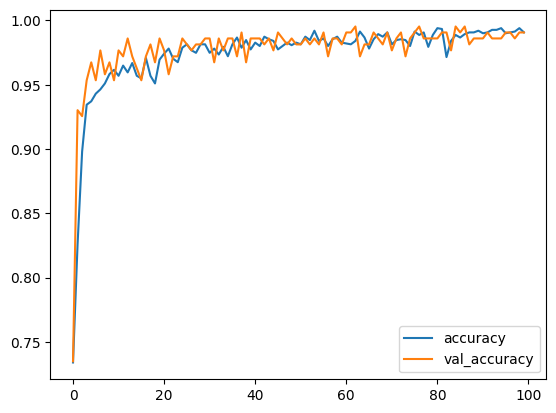

In [ ]:
dataf[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

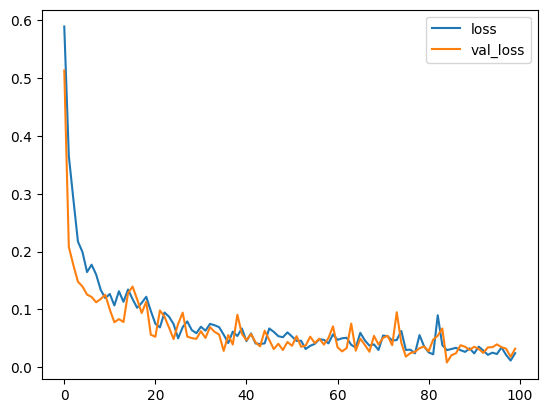

In [ ]:
dataf[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(test_image_gen)

7/7 [==============================] - 10s 1s/step - loss: 0.0360 - accuracy: 0.9884


[0.036005899310112, 0.9884259104728699]

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions

7/7 [==============================] - 8s 956ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       116
           1       0.99      1.00      0.99       316

    accuracy                           0.99       432
   macro avg       0.99      0.98      0.99       432
weighted avg       0.99      0.99      0.99       432



Confusion matrix, without normalization
[[112   4]
 [  1 315]]


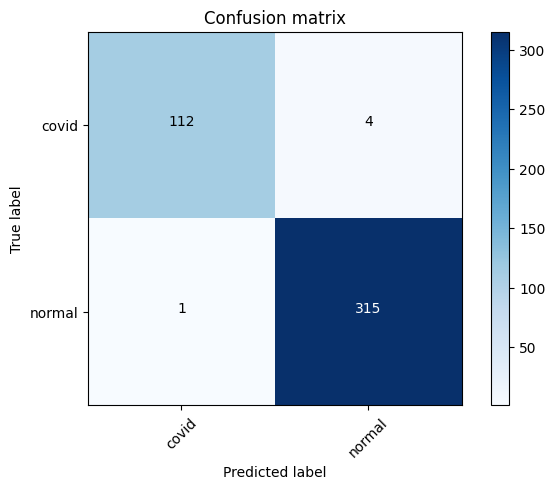

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)

In [ ]:
model.save('ModelCNN.h5')